# OpenVaccine: COVID-19 mRNA Vaccine Degradation Prediction 

## load libraries

In [70]:
import numpy as np
import pandas as pd

import japanize_matplotlib
import json
import re

## load data

In [71]:
train = pd.read_json('../input/stanford-covid-vaccine/train.json', lines=True)
test = pd.read_json('../input/stanford-covid-vaccine/test.json', lines=True)
sample_submission = pd.read_csv('../input/stanford-covid-vaccine/sample_submission.csv')

In [72]:
train.head()

,index,id,sequence,structure,predicted_loop_type,signal_to_noise,SN_filter,seq_length,seq_scored,reactivity_error,deg_error_Mg_pH10,deg_error_pH10,deg_error_Mg_50C,deg_error_50C,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,0,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.....((((((.......)))).)).((.....((..((((((......,EEEEESSSSSSHHHHHHHSSSSBSSXSSIIIIISSIISSSSSSHHH...,6.894,1,107,68,"[0.1359, 0.20700000000000002, 0.1633, 0.1452, ...","[0.26130000000000003, 0.38420000000000004, 0.1...","[0.2631, 0.28600000000000003, 0.0964, 0.1574, ...","[0.1501, 0.275, 0.0947, 0.18660000000000002, 0...","[0.2167, 0.34750000000000003, 0.188, 0.2124, 0...","[0.3297, 1.5693000000000001, 1.1227, 0.8686, 0...","[0.7556, 2.983, 0.2526, 1.3789, 0.637600000000...","[2.3375, 3.5060000000000002, 0.3008, 1.0108, 0...","[0.35810000000000003, 2.9683, 0.2589, 1.4552, ...","[0.6382, 3.4773, 0.9988, 1.3228, 0.78770000000..."
1,1,id_0049f53ba,GGAAAAAGCGCGCGCGGUUAGCGCGCGCUUUUGCGCGCGCUGUACC...,.....(((((((((((((((((((((((....)))))))))).)))...,EEEEESSSSSSSSSSSSSSSSSSSSSSSHHHHSSSSSSSSSSBSSS...,0.193,0,107,68,"[2.8272, 2.8272, 2.8272, 4.7343, 2.5676, 2.567...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[10.1986, 9.2418, 5.0933, 5.0933, 5.0933, 5.09...","[16.6174, 13.868, 8.1968, 8.1968, 8.1968, 8.19...","[15.4857, 7.9596, 13.3957, 5.8777, 5.8777, 5.8...","[0.0, 0.0, 0.0, 2.2965, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.947, 4.4523, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.8511, 4.0426, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[7.6692, 0.0, 10.9561, 0.0, 0.0, 0.0, 0.0, 0.0..."
2,2,id_006f36f57,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,.....((((.((.....((((.(((.....)))..((((......)...,EEEEESSSSISSIIIIISSSSMSSSHHHHHSSSMMSSSSHHHHHHS...,8.800,1,107,68,"[0.0931, 0.13290000000000002, 0.11280000000000...","[0.1365, 0.2237, 0.1812, 0.1333, 0.1148, 0.160...","[0.17020000000000002, 0.178, 0.111, 0.091, 0.0...","[0.1033, 0.1464, 0.1126, 0.09620000000000001, ...","[0.14980000000000002, 0.1761, 0.1517, 0.116700...","[0.44820000000000004, 1.4822, 1.1819, 0.743400...","[0.2504, 1.4021, 0.9804, 0.49670000000000003, ...","[2.243, 2.9361, 1.0553, 0.721, 0.6396000000000...","[0.5163, 1.6823000000000001, 1.0426, 0.7902, 0...","[0.9501000000000001, 1.7974999999999999, 1.499..."
3,3,id_0082d463b,GGAAAAGCGCGCGCGCGCGCGCGAAAAAGCGCGCGCGCGCGCGCGC...,......((((((((((((((((......))))))))))))))))((...,EEEEEESSSSSSSSSSSSSSSSHHHHHHSSSSSSSSSSSSSSSSSS...,0.104,0,107,68,"[3.5229, 6.0748, 3.0374, 3.0374, 3.0374, 3.037...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[11.8007, 12.7566, 5.7733, 5.7733, 5.7733, 5.7...","[121286.7181, 121286.7182, 121286.7181, 121286...","[15.3995, 8.1124, 7.7824, 7.7824, 7.7824, 7.78...","[0.0, 2.2399, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, -0.5083, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[3.4248, 6.8128, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -0.8365, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[7.6692, -1.3223, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
4,4,id_0087940f4,GGAAAAUAUAUAAUAUAUUAUAUAAAUAUAUUAUAGAAGUAUAAUA...,.....(((((((.((((((((((((.(((((((((....)))))))...,EEEEESSSSSSSBSSSSSSSSSSSSBSSSSSSSSSHHHHSSSSSSS...,0.423,0,107,68,"[1.665, 2.1728, 2.0041, 1.2405, 0.620200000000...","[4.2139, 3.9637000000000002, 3.2467, 2.4716, 1...","[3.0942, 3.015, 2.1212, 2.0552, 0.881500000000...","[2.6717, 2.4818, 1.9919, 2.5484999999999998, 1...","[1.3285, 3.6173, 1.3057, 1.3021, 1.1507, 1.150...","[0.8267, 2.6577, 2.8481, 0.40090000000000003, ...","[2.1058, 3.138, 2.5437000000000003, 1.0932, 0....","[4.7366, 4.6243, 1.2068, 1.1538, 0.0, 0.0, 0.7...","[2.2052, 1.7947000000000002, 0.7457, 3.1233, 0...","[0.0, 5.1198, -0.3551, -0.3518, 0.0, 0.0, 0.0,..."


In [73]:
test.head()

,index,id,sequence,structure,predicted_loop_type,seq_length,seq_scored
0,0,id_00073f8be,GGAAAAGUACGACUUGAGUACGGAAAACGUACCAACUCGAUUAAAA...,......((((((((((.(((((.....))))))))((((((((......,EEEEEESSSSSSSSSSBSSSSSHHHHHSSSSSSSSSSSSSSSSHHH...,107,68
1,1,id_000ae4237,GGAAACGGGUUCCGCGGAUUGCUGCUAAUAAGAGUAAUCUCUAAAU...,.....((((..((((((...(((((.....((((....)))).......,EEEEESSSSIISSSSSSIIISSSSSIIIIISSSSHHHHSSSSIIII...,130,91
2,2,id_00131c573,GGAAAACAAAACGGCCUGGAAGACGAAGGAAUUCGGCGCGAAGGCC...,...........((.(((.(.(..((..((..((((...))))..))...,EEEEEEEEEEESSISSSISISIISSIISSIISSSSHHHSSSSIISS...,107,68
3,3,id_00181fd34,GGAAAGGAUCUCUAUCGAAGGAUAGAGAUCGCUCGCGACGGCACGA...,......((((((((((....))))))))))((((((..((.(((.....,EEEEEESSSSSSSSSSHHHHSSSSSSSSSSSSSSSSIISSISSSHH...,107,68
4,4,id_0020473f7,GGAAACCCGCCCGCGCCCGCCCGCGCUGCUGCCGUGCCUCCUCUCC...,.....(((((((((((((((((((((((((((((((((((((((((...,EEEEESSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS...,130,91


In [74]:
sample_submission.head()

,id_seqpos,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,id_00073f8be_0,0.0,0.0,0.0,0.0,0.0
1,id_00073f8be_1,0.0,0.0,0.0,0.0,0.0
2,id_00073f8be_2,0.0,0.0,0.0,0.0,0.0
3,id_00073f8be_3,0.0,0.0,0.0,0.0,0.0
4,id_00073f8be_4,0.0,0.0,0.0,0.0,0.0


## check shape

In [75]:
train.shape

(2400, 19)

In [76]:
test.shape

(3634, 7)

In [77]:
sample_submission.shape

(457953, 6)

## check null

In [78]:
train.isnull().sum()

index                  0
id                     0
sequence               0
structure              0
predicted_loop_type    0
signal_to_noise        0
SN_filter              0
seq_length             0
seq_scored             0
reactivity_error       0
deg_error_Mg_pH10      0
deg_error_pH10         0
deg_error_Mg_50C       0
deg_error_50C          0
reactivity             0
deg_Mg_pH10            0
deg_pH10               0
deg_Mg_50C             0
deg_50C                0
dtype: int64

In [79]:
test.isnull().sum()

index                  0
id                     0
sequence               0
structure              0
predicted_loop_type    0
seq_length             0
seq_scored             0
dtype: int64

## check dtypes

In [80]:
train.dtypes

index                    int64
id                      object
sequence                object
structure               object
predicted_loop_type     object
signal_to_noise        float64
SN_filter                int64
seq_length               int64
seq_scored               int64
reactivity_error        object
deg_error_Mg_pH10       object
deg_error_pH10          object
deg_error_Mg_50C        object
deg_error_50C           object
reactivity              object
deg_Mg_pH10             object
deg_pH10                object
deg_Mg_50C              object
deg_50C                 object
dtype: object

In [81]:
test.dtypes

index                   int64
id                     object
sequence               object
structure              object
predicted_loop_type    object
seq_length              int64
seq_scored              int64
dtype: object

## id

In [82]:
len(train["id"].unique())

2400

In [83]:
len(test["id"].unique())

3634

## sequence

In [84]:
train["sequence"].value_counts()

GGAAACGGCGUCCGGCAGCCGGCCAGUCCGGCGACCGCGGACGGGCACGGCUGGCCGGAUGACGCCGCGAACAGCUUCGGCUGUUCAAAAGAAACAACAACAACAAC    1
GGAAAUAAAUAAAUAAUAAUAAAUAAAUAAAUAAAUAAAUAAAUAAAUAAAUAAAUAAAUAAAUAAAAAUAUAUUUUCGAAUAUAUAAAAGAAACAACAACAACAAC    1
GGAAAACAAAAACAAACAACAAAAACAAACAACAAAAACAAACAACAAAAACAAACAACAAAAACAAGGCUCGGGUUCGCCCGGGCAAAAGAAACAACAACAACAAC    1
GGAAAGCCCGCGGAGCCGGGAGCGGAGGCCGCCCAGGCCGCGCGGCACGCGCCACCGACGAGGCCGGCCCAAAUCUUCGGAUUUGGAAAAGAAACAACAACAACAAC    1
GGAAACGGUAUGCAGGGUACACCUUAAGGAGGUUAAUCAGAUAAACAGUACGCAAAGAUAUCUGGACACUGGACCUUCGGGUCUAGAAAAGAAACAACAACAACAAC    1
                                                                                                              ..
GGAAACGGUAUGCAGGGUACACCUUAAGGAGGUUAAUCAGAUAAACAGUACGCAAAGAUAUCUGGACACGCGGCCUUCGGGCCGCGAAAAGAAACAACAACAACAAC    1
GGAAACCGAGGGCAGUCUCUAUAGGGUCGUCGUAUAUACGUUCGGUGGUUCUGGGAGAUCCUUAAGCGCGCGUCGUUCGCGAUGCGAAAAGAAACAACAACAACAAC    1
GGAAAUUCAUCGACAGAGACAUCAUUGCAUAGAAACAGAAGACAGAGUUUGGGCGGCUCCUUAUUUUAGAGACUCUUCGGAGUCUCAAAAGAAACA

In [85]:
test["sequence"].value_counts()

GGAAACGUGCUUGGGCGAGAGUAGUACUAGGAUGGGUGACCUCCUGGGAAGUCCUCGUGUUGCACCACGGGCACGUUCGCGUGCUCAAAAGAAACAACAACAACAAC                           1
GGAAAAACGUGGCUGACCGAAAGGUCGACUUCAGAGUUGCCGAAAGGCAAGGAGAAGAGUAUGCCACGGGAAGCCUUCGGGUUUCCAAAAACCCUUGCUUCGGCAAGGGAAAAGAAACAACAACAACAAC    1
GGAAAUUUGUAUGGAAAAGUGGAAUGUGAGAGGAAAAAUAAAAAUUUUGAUGGAAUAUAUUAUGCGGAGUCAGGGUUCGCUCUGACAAAAGAAACAACAACAACAAC                           1
GGAAAGUCUAGACGAACUAACUAGGACAUCCCUAGGUGAAGUACCAAACUCACACGUAAAGACCUAAGACAUGACAUGUGUCGGUUUAAUGCGUUCACUUCGGUGAACGAAAAGAAACAACAACAACAAC    1
GGAAAGCGCAAAGCGCAAACCUCUGGAAACGGACGGACGGGAAACUGGACGGACGAAAACAGAGAAAAGAGAUAGUUCGCUGUCUCAAAAGAAACAACAACAACAAC                           1
                                                                                                                                     ..
GGAAAAGUAACGCUUUUGCGUCGCAAAUUUGGUAUAGGAUUGGAGUUAACAAUCGUAUCCUAAUGUUGCGACCAUAAAGCGAACGCCUGAAGCAGUCCUUCGGGACUGCAAAAGAAACAACAACAACAAC    1
GGAAAUCGUUCGAAUAUGUCCCAACUUCGCUGCCAGACUCAAAUAUAC

train, testともに配列はuniqueな値である(当たり前)

### 配列の長さ

In [86]:
train["len_sequence"] = train["sequence"].map(lambda x: len(x))
train["len_sequence"].value_counts()

107    2400
Name: len_sequence, dtype: int64

In [87]:
test["len_sequence"] = test["sequence"].map(lambda x: len(x))
test["len_sequence"].value_counts()

130    3005
107     629
Name: len_sequence, dtype: int64

コンペのページのデータの説明のとおりになっていることが分かる
testのうち
長さ130の配列：private test用
長さ107の配列：public test用

### 各塩基の個数

In [88]:
train["G"] = train["sequence"].map(lambda x: x.count("G"))
train["A"] = train["sequence"].map(lambda x: x.count("A"))
train["C"] = train["sequence"].map(lambda x: x.count("C"))
train["U"] = train["sequence"].map(lambda x: x.count("U"))

DNAの塩基はA, T, G, Cだが、RNA内ではTはUに変換される

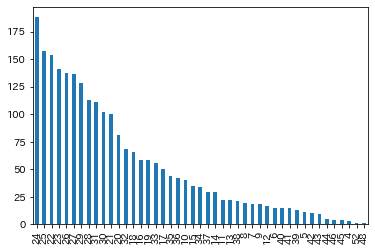

In [89]:
train["G"].value_counts().plot.bar()

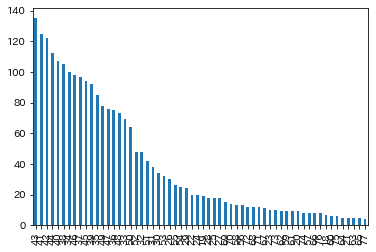

In [90]:
train["A"].value_counts().plot.bar()

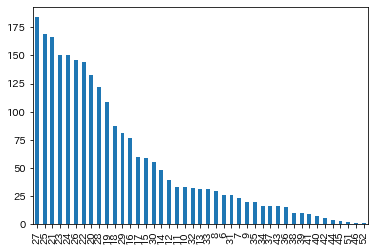

In [91]:
train["C"].value_counts().plot.bar()

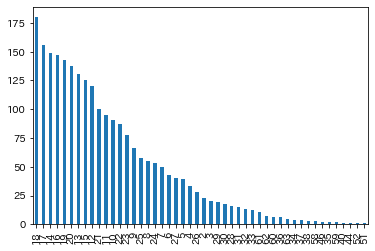

In [92]:
train["U"].value_counts().plot.bar()

ちょっとこれ見ただけじゃなんも言えない

### アミノ酸への翻訳

In [93]:
from Bio.Seq import Seq
train["amino_acid"] = train["sequence"].map(lambda x: Seq(x).translate())

/home/kimura_sampler/anaconda3/envs/probspace_realestate/lib/python3.8/site-packages/Bio/Seq.py:2334: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [94]:
train["amino_acid"]

0       (G, K, A, L, I, T, G, D, *, D, Y, V, F, L, G, ...
1       (G, K, S, A, R, G, *, R, A, L, L, R, A, L, Y, ...
2       (G, K, C, S, D, K, L, S, S, N, S, N, R, I, E, ...
3       (G, K, A, R, A, R, A, R, K, S, A, R, A, R, A, ...
4       (G, K, Y, I, I, Y, Y, I, N, I, L, *, K, Y, N, ...
                              ...                        
2395    (G, K, *, Q, R, K, Y, *, S, N, C, K, G, R, S, ...
2396    (G, K, Q, K, Q, T, T, K, T, N, N, K, N, K, Q, ...
2397    (G, K, P, Y, L, G, F, G, L, G, M, A, V, I, W, ...
2398    (G, N, D, S, R, R, D, R, Y, R, A, *, A, K, N, ...
2399    (G, K, L, G, R, G, S, V, A, L, H, T, G, T, P, ...
Name: amino_acid, Length: 2400, dtype: object

配列が完全ではないため、長さが3の倍数になっておらず、アミノ酸に変換はできなかった...

## structure

In [95]:
train["structure"].value_counts()

....................................................................(((((((....))))))).....................    278
.....((((..(....)..))))......(((....))).............................(((((((....))))))).....................     60
.....((.(((.((...)).))).))((((((((..(((.((((...)))).)))..))))))))...(((((((....))))))).....................     49
.....((((((((((((((((((((((((((((((...))))))))))))))))))))))))))))))(((((((....))))))).....................     42
.....((((((((....)))))))).((((((((....)))))))).((((((((....)))))))).(((((((....))))))).....................     42
                                                                                                              ... 
...........((((((..(((.(((.((.............))...))).)))..)))...)))...(((((((....))))))).....................      1
.....((((((((((((....((((((.(((((.......)))))))))))....)))))))))))).(((((((....))))))).....................      1
.....((((((((.(((...(((.(((((.((((...))))..)))))..)))..))).)))))))).(((((((....)

In [96]:
test["structure"].value_counts()

.....((((((((((.....))))))))))....((((((((((.....))))))))))....((((((((((.....))))))))))...(((((((....))))))).....................    175
...........................................................................................(((((((....))))))).....................    118
.....((((((((((..((((((((((.(((((((((((((((.((....)).))))))))))))))).))))))))))..))))))))))(((((((....))))))).....................     87
.....((((((((....)))))))).((((((((....)))))))).((((((((....)))))))).((((((((....))))))))...(((((((....))))))).....................     68
..........................((((((((((((((..................................))))))))))))))...(((((((....))))))).....................     56
                                                                                                                                     ... 
.......(((((((((((((((....))))))))))))))).......................(((.((.......)).)))........(((((((....))))))).....................      1
............((((((...(((((((....((

塩基のペアのパターンはユニークではない

### ペアの個数

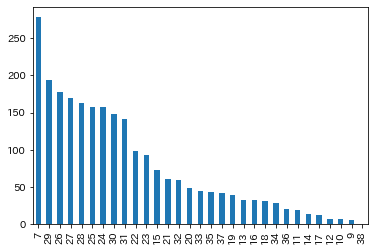

In [97]:
train["num_pair"] = train["structure"].map(lambda x: x.count("("))
train["num_pair"].value_counts().plot.bar()

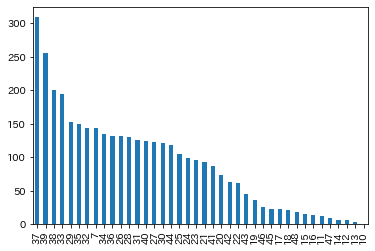

In [98]:
test["num_pair"] = test["structure"].map(lambda x: x.count("("))
test["num_pair"].value_counts().plot.bar()

### A-T(U)塩基対, G-C塩基対

In [99]:
train["A_U"] = 0
train["G_C"] = 0
for i in range(len(train["structure"])):
    s_list = [m.start() for m in re.finditer("\(", train["structure"].iloc[i])]
    t_list = [m.start() for m in re.finditer("\)", train["structure"].iloc[i])]
    pair_list = []
    for j in s_list:
        pair_list.append(train["sequence"].iloc[i][j])
    for k in t_list:
        pair_list.append(train["sequence"].iloc[i][k])
    train["A_U"].iloc[i] = pair_list.count("A")
    train["G_C"].iloc[i] = pair_list.count("G")

/home/kimura_sampler/anaconda3/envs/probspace_realestate/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [102]:
test["A_U"] = 0
test["G_C"] = 0
for i in range(len(test["structure"])):
    s_list = [m.start() for m in re.finditer("\(", test["structure"].iloc[i])]
    t_list = [m.start() for m in re.finditer("\)", test["structure"].iloc[i])]
    pair_list = []
    for j in s_list:
        pair_list.append(test["sequence"].iloc[i][j])
    for k in t_list:
        pair_list.append(test["sequence"].iloc[i][k])
    test["A_U"].iloc[i] = pair_list.count("A")
    test["G_C"].iloc[i] = pair_list.count("G")

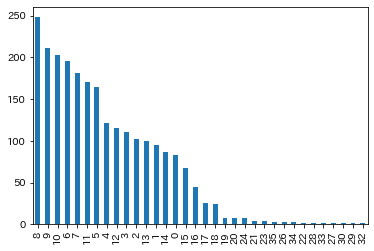

In [100]:
train["A_U"].value_counts().plot.bar()

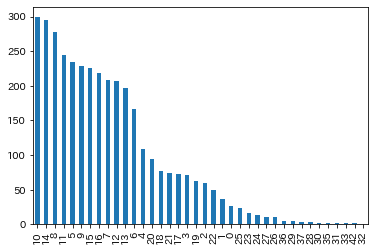

In [103]:
test["A_U"].value_counts().plot.bar()

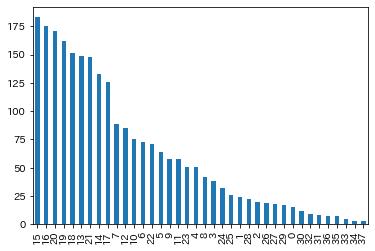

In [101]:
train["G_C"].value_counts().plot.bar()

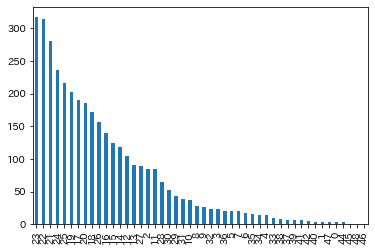

In [104]:
test["G_C"].value_counts().plot.bar()

## predicted loop type

In [106]:
train["predicted_loop_type"].value_counts()

EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEESSSSSSSHHHHSSSSSSSEEEEEEEEEEEEEEEEEEEEE    278
EEEEESSSSSSSSSSSSSSSSSSSSSSSSSSSSSSHHHSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSHHHHSSSSSSSEEEEEEEEEEEEEEEEEEEEE     42
EEEEESSSSIISHHHHSIISSSSXXXXXXSSSHHHHSSSXXXXXXXXXXXXXXXXXXXXXXXXXXXXXSSSSSSSHHHHSSSSSSSEEEEEEEEEEEEEEEEEEEEE     32
EEEEESSSSIISHHHHSIISSSSMMMMMMSSSHHHHSSSMMMMMMMMMMMMMMMMMMMMMMMMMMMMMSSSSSSSHHHHSSSSSSSEEEEEEEEEEEEEEEEEEEEE     28
EEEEESSSSSSSSHHHHSSSSSSSSXSSSSSSSSHHHHSSSSSSSSXSSSSSSSSHHHHSSSSSSSSXSSSSSSSHHHHSSSSSSSEEEEEEEEEEEEEEEEEEEEE     28
                                                                                                              ... 
EEEEEEEEEEEEEEEESSSSSSSHHHHHHSSSSSSSXXSSSSSSSSSSSHHHHHHHHSSSSSSSSSSSSSSSSSSHHHHSSSSSSSEEEEEEEEEEEEEEEEEEEEE      1
EEEEEESSSSSSHHHHSSSSSSSSSSISSSSSSHHHHHHSSSSSSISSSSXXXXSSSSHHHHSSSSXXSSSSSSSHHHHSSSSSSSEEEEEEEEEEEEEEEEEEEEE      1
EEEEEESSSSIIISSSSSSSSIIIISSBSSSBBSSHHHHSSSSSSSIIISSSSBBSSSSISSSSXXXXSSSSSSSHHHHS

In [107]:
test["predicted_loop_type"].value_counts()

EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEESSSSSSSHHHHSSSSSSSEEEEEEEEEEEEEEEEEEEEE    118
EEEEESSSSSSSSSSHHHHHSSSSSSSSSSXXXXSSSSSSSSSSHHHHHSSSSSSSSSSXXXXSSSSSSSSSSHHHHHSSSSSSSSSSXXXSSSSSSSHHHHSSSSSSSEEEEEEEEEEEEEEEEEEEEE    118
EEEEESSSSSSSSSSIISSSSSSSSSSISSSSSSSSSSSSSSSISSHHHHSSISSSSSSSSSSSSSSSISSSSSSSSSSIISSSSSSSSSSSSSSSSSHHHHSSSSSSSEEEEEEEEEEEEEEEEEEEEE     87
EEEEESSSSSSSSSSHHHHHSSSSSSSSSSMMMMSSSSSSSSSSHHHHHSSSSSSSSSSMMMMSSSSSSSSSSHHHHHSSSSSSSSSSMMMSSSSSSSHHHHSSSSSSSEEEEEEEEEEEEEEEEEEEEE     57
EEEEEEEEEEEEEEEEEEEEEEEEEESSSSSSSSSSSSSSHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHSSSSSSSSSSSSSSXXXSSSSSSSHHHHSSSSSSSEEEEEEEEEEEEEEEEEEEEE     56
                                                                                                                                     ... 
EEEEEEEEEEEEEEESSSSSSSSIISSSSSBSSSSSSSSBSSSSSSSSSSHHHHHHSSSSSSSSSSSSSSSSSSSSSSSIIISSSSSSSSXSSSSSSSHHHHSSSSSSSEEEEEEEEEEEEEEEEEEEEE      1
EEEEEEEEEEESSSSSSBSISSSSSSSBSISSSS